# Prediction of Forex Movement with Sentiment Analysis 

## Modelling & Evaluation

## Import packages

In [5]:
# Packages / libraries
import os #provides functions for interacting with the operating system
import numpy as np 
np.set_printoptions(formatter={'float_kind':'{:f}'.format})
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, explained_variance_score, confusion_matrix, accuracy_score, classification_report, log_loss,  mean_squared_error
from math import sqrt
%matplotlib inline
from sklearn import metrics 

In [4]:
MNSS = pd.read_csv('MNSS_final.csv')
print(MNSS.shape)
MNSS.head(5)

(51, 9)


,date,open,high,low,close,binary_close,volume,score,binary_score
0,4/1/2019,1.13901,1.14189,1.13456,1.13943,1,403759,0.220284,1
1,29/1/2019,1.14295,1.14501,1.14111,1.14348,1,424908,-0.354276,0
2,30/1/2019,1.14348,1.15016,1.14062,1.14853,1,431868,-0.618718,0
3,4/2/2019,1.14543,1.14603,1.14244,1.14349,0,367156,-0.245374,0
4,11/3/2019,1.12315,1.12738,1.12217,1.12591,1,323934,-0.216506,0


## Sentence-based Sentiment Analysis 

In [4]:
# LOGISTIC REGRESSION

MNSS = pd.read_csv('MNSS_final.csv')
X = MNSS['score']
X = X.values.reshape((-1, 1))
y = MNSS['binary_close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
log_reg = LogisticRegression(random_state=10, solver = 'lbfgs')
log_reg.fit(X_train, y_train)
log_reg.predict(X_train)
y_pred = log_reg.predict(X_train)
pred_proba = log_reg.predict_proba(X_train)
print("The Testing Accuracy is: ", log_reg.score(X_test, y_test))

The Testing Accuracy is:  0.5454545454545454


In [5]:
# SVM (kernel='rbf')
MNSS = pd.read_csv('MNSS_final.csv')
X = MNSS['score']
X = X.values.reshape((-1, 1))
y = MNSS['binary_close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
svm_rbf = svm.SVC(kernel='rbf')
svm_rbf.fit(X_train, y_train)
svm_rbf.predict(X_train)
y_pred = svm_rbf.predict(X_train)
print("The Testing Accuracy is: ", svm_rbf.score(X_test, y_test))
print(classification_report(y_train, y_pred))
print(confusion_matrix(y_train, y_pred))

The Testing Accuracy is:  0.6363636363636364
              precision    recall  f1-score   support

           0       0.67      0.29      0.40        14
           1       0.71      0.92      0.80        26

    accuracy                           0.70        40
   macro avg       0.69      0.60      0.60        40
weighted avg       0.69      0.70      0.66        40

[[ 4 10]
 [ 2 24]]


In [6]:
# SVM (kernel='poly')
MNSS = pd.read_csv('MNSS_final.csv')
X = MNSS['score']
X = X.values.reshape((-1, 1))
y = MNSS['binary_close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
svm_poly = svm.SVC(kernel='poly')
svm_poly.fit(X_train, y_train)
svm_poly.predict(X_train)
y_pred = svm_poly.predict(X_train)
print("The Testing Accuracy is: ", svm_poly.score(X_test, y_test))

The Testing Accuracy is:  0.5454545454545454


In [8]:
# SVM (kernel='linear')
MNSS = pd.read_csv('MNSS_final.csv')
X = MNSS['score']
X = X.values.reshape((-1, 1))
y = MNSS['binary_close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
svm_linear = svm.SVC(kernel='linear')
svm_linear.fit(X_train, y_train)
svm_linear.predict(X_train)
y_pred = svm_linear.predict(X_train)
print("The Testing Accuracy is: ", svm_linear.score(X_test, y_test))

The Testing Accuracy is:  0.5454545454545454


In [10]:
# DECISION TREE

MNSS = pd.read_csv('MNSS_final.csv')
X = MNSS['score']
X = X.values.reshape((-1, 1))
y = MNSS['binary_close']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1,test_size=0.2)
dt =  DecisionTreeClassifier()
dt =  dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)
print("The Testing Accuracy is: ",metrics.accuracy_score(y_test,y_pred))

The Testing Accuracy is:  0.6363636363636364


In [7]:
# K NEAREST NEIGHBOURS

MNSS = pd.read_csv('MNSS_final.csv')
X = MNSS['score']
X = X.values.reshape((-1, 1))
y = MNSS['binary_close']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1,test_size=0.2)
knn = KNeighborsClassifier(n_neighbors = 5 )
knn.fit(X_train, y_train)
y_predict = knn.predict(X_test)
print("The Testing Accuracy is: ",knn.score(X_test, y_test))

The Testing Accuracy is:  0.6363636363636364


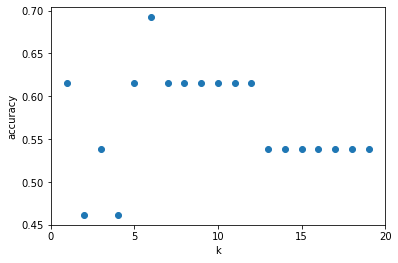

In [3]:
MNSS = pd.read_csv('MNSS_final.csv')
X = MNSS['score']
X = X.values.reshape((-1, 1))
y = MNSS['binary_close']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
# K is user specified , how do we know which K is the best to use ? 
k_range = range(1,20)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))

plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20]);

In [8]:
# GAUSSIAN NAIVE BAYES

MNSS = pd.read_csv('MNSS_final.csv')
X = MNSS['score']
X = X.values.reshape((-1, 1))
y = MNSS['binary_close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
gnb = GaussianNB()
gnb.fit(X_train, y_train)
gnb.predict(X_train)
y_pred = gnb.predict(X_train)
print("The Testing Accuracy is: ", gnb.score(X_test, y_test))

The Testing Accuracy is:  0.6363636363636364


## Word-based Sentiment Analysis

In [11]:
# LOGISTIC REGRESSION

MNWS = pd.read_csv('MNWS_final.csv')
X = MNWS['score']
X = X.values.reshape((-1, 1))
y = MNWS['binary_close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
log_reg = LogisticRegression(random_state=10, solver = 'lbfgs')
log_reg.fit(X_train, y_train)
log_reg.predict(X_train)
y_pred = log_reg.predict(X_train)
pred_proba = log_reg.predict_proba(X_train)
print("The Testing Accuracy is: ", log_reg.score(X_test, y_test))

The Testing Accuracy is:  0.7


In [12]:
# SVM (kernel='rbf')
MNWS = pd.read_csv('MNWS_final.csv')
X = MNWS['score']
X = X.values.reshape((-1, 1))
y = MNWS['binary_close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
svm_rbf = svm.SVC(kernel='rbf')
svm_rbf.fit(X_train, y_train)
svm_rbf.predict(X_train)
y_pred = svm_rbf.predict(X_train)
print("The Testing Accuracy is: ", svm_rbf.score(X_test, y_test))

The Testing Accuracy is:  0.6


In [11]:
# SVM (kernel='poly')
MNWS = pd.read_csv('MNWS_final.csv')
X = MNWS['score']
X = X.values.reshape((-1, 1))
y = MNWS['binary_close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
svm_poly = svm.SVC(kernel='poly')
svm_poly.fit(X_train, y_train)
svm_poly.predict(X_train)
y_pred = svm_poly.predict(X_train)
print("The Testing Accuracy is: ", svm_poly.score(X_test, y_test))

The Testing Accuracy is:  0.6


In [7]:
# SVM (kernel='linear')
MNWS = pd.read_csv('MNWS_final.csv')
X = MNWS['score']
X = X.values.reshape((-1, 1))
y = MNWS['binary_close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
svm_linear = svm.SVC(kernel='linear')
svm_linear.fit(X_train, y_train)
svm_linear.predict(X_train)
y_pred = svm_linear.predict(X_train)
print("The Testing Accuracy is: ", svm_linear.score(X_test, y_test))
print(classification_report(y_train, y_pred))
print(confusion_matrix(y_train, y_pred))

The Testing Accuracy is:  0.8
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        14
           1       0.62      1.00      0.77        23

    accuracy                           0.62        37
   macro avg       0.31      0.50      0.38        37
weighted avg       0.39      0.62      0.48        37

[[ 0 14]
 [ 0 23]]


C:\Users\bluec\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [17]:
# DECISION TREE
MNWS = pd.read_csv('MNWS_final.csv')
X = MNWS['score']
X = X.values.reshape((-1, 1))
y = MNWS['binary_close']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1,test_size=0.2)
dt =  DecisionTreeClassifier()
dt =  dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)
print("The Testing Accuracy is: ",metrics.accuracy_score(y_test,y_pred))

The Testing Accuracy is:  0.4


In [9]:
# K NEAREST NEIGHBOURS

MNWS = pd.read_csv('MNWS_final.csv')
X = MNWS['score']
X = X.values.reshape((-1, 1))
y = MNWS['binary_close']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1,test_size=0.2)
knn = KNeighborsClassifier(n_neighbors = 5 )
knn.fit(X_train, y_train)
y_predict = knn.predict(X_test)
print("The Testing Accuracy is: ",knn.score(X_test, y_test))

The Testing Accuracy is:  0.5


In [10]:
# GAUSSIAN NAIVE BAYES

MNWS = pd.read_csv('MNWS_final.csv')
X = MNWS['score']
X = X.values.reshape((-1, 1))
y = MNWS['binary_close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
gnb = GaussianNB()
gnb.fit(X_train, y_train)
gnb.predict(X_train)
y_pred = gnb.predict(X_train)
print("The Testing Accuracy is: ", gnb.score(X_test, y_test))

The Testing Accuracy is:  0.6


## Objective 2

In [25]:
# Positive scores using SVM (kernel='rbf')

wpositive = pd.read_csv('wpositive.csv')
X = wpositive['score']
X = X.values.reshape((-1, 1))
y = wpositive['binary_close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
svm_rbf = svm.SVC(kernel='linear')
svm_rbf.fit(X_train, y_train)
svm_rbf.predict(X_train)
y_pred = svm_rbf.predict(X_train)
print("The Testing Accuracy is: ", svm_rbf.score(X_test, y_test))
print(classification_report(y_train, y_pred))
print(confusion_matrix(y_train, y_pred))

# all three (rbf, poly, linear) returns the same result for both accuracy and classfication report

The Testing Accuracy is:  0.4
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.74      1.00      0.85        14

    accuracy                           0.74        19
   macro avg       0.37      0.50      0.42        19
weighted avg       0.54      0.74      0.63        19

[[ 0  5]
 [ 0 14]]


In [22]:
# Negative scores using SVM (kernel='rbf')

wnegative = pd.read_csv('wnegative.csv')
X = wnegative['score']
X = X.values.reshape((-1, 1))
y = wnegative['binary_close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
svm_rbf = svm.SVC(kernel='rbf')
svm_rbf.fit(X_train, y_train)
svm_rbf.predict(X_train)
y_pred = svm_rbf.predict(X_train)
print("The Testing Accuracy is: ", regr.score(X_test, y_test))
print(classification_report(y_train, y_pred))
print(confusion_matrix(y_train, y_pred))

#all three rbf, linear and poly returned the same accuracy, rbf is chose due to the availability in classification report.
#When true positive + false positive == 0, precision returns 0 

The Testing Accuracy is:  0.8
              precision    recall  f1-score   support

           0       0.50      0.29      0.36         7
           1       0.64      0.82      0.72        11

    accuracy                           0.61        18
   macro avg       0.57      0.55      0.54        18
weighted avg       0.59      0.61      0.58        18

[[2 5]
 [2 9]]
